In [1]:
import pandas as pd
wine_df = pd.read_csv('data/wine_cleared.csv')
import statistics

Задание 4.1

Внимательно изучите документацию к методу df.corr(). Что означает аргумент method в df.corr()?

***Название метода расчёта коэффициента корреляции.***

_______________________________________________________
Кадр данных. corr(method='pearson', min_periods=1, numeric_only=False)

Параметры
*method{'pearson', 'kendall', 'spearman'} или вызываемый*

Метод корреляции:

- Пирсон : Стандартный коэффициент корреляции

- Кендалл : Коэффициент корреляции Кендалла-Тау

- Спирмен : Ранговая корреляция Спирмена

     - Вызываемый: вызываемый с вводом двух 1D ndarrays и возврат поплавка. 

    *Обратите внимание, что возвращаемая матрица из corr будет иметь 1 по диагоналям и будет симметричной независимо от поведения вызываемого.*
    _______________________

→ Аргумент method указывает на название используемого метода расчёта корреляции: 
- 'pearson' — корреляция Пирсона, 
- 'kendall' — корреляция Кендалла, 
- 'spearman' — корреляция Спирмена. 

Каждый метод может быть применён для разных типов данных. 

Давайте разберёмся, чем отличаются эти методы и для каких типов данных применять каждый из них.

                                     КОРРЕЛЯЦИЯ ПИРСОНА

Рассчитав в прошлом юните коэффициент корреляции между point и price, мы использовали *df.corr()*. Согласно документации, если не указать method, по умолчанию используется корреляция Пирсона. Верно ли это для наших признаков?

***Коэффициент корреляции Пирсона используется для вычисления линейной взаимосвязи между признаками.***

*Линейная взаимосвязь — вид связи между признаками, в котором изменение одного признака x`1` всегда приводит к изменению другого признака x`2`  на величину, пропорциональную изменению X`1`, в соответствии с правилом:  x`2` = ax`1` + b (уравнение прямой), где *a* и  *b* — некоторые коэффициенты.*

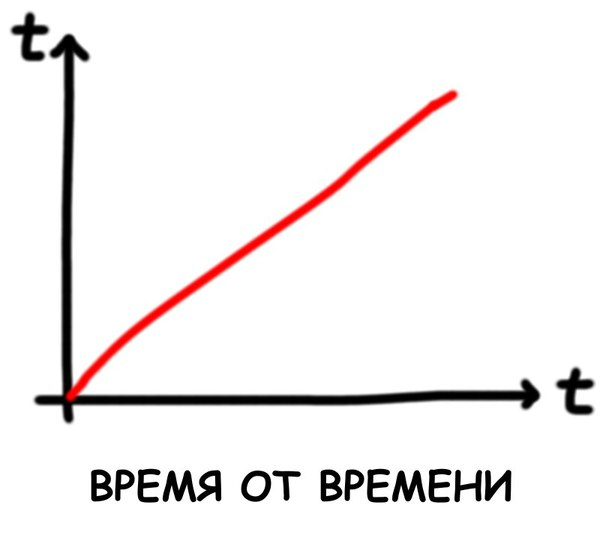

*Графическая интерпретация выражения «время от времени». Источник: Пикабу*
__________
Определить существование линейной связи в паре признаков эмпирическим путем можно, если вы можете формулировать фразу про признаки: «С уменьшением/увеличением признака 1 уменьшается/увеличивается признак 2 в соответствии с некоторым уравнением прямой». 
______________________

Например, с увеличением возраста заёмщика уменьшается количество дней просрочки по кредиту. 

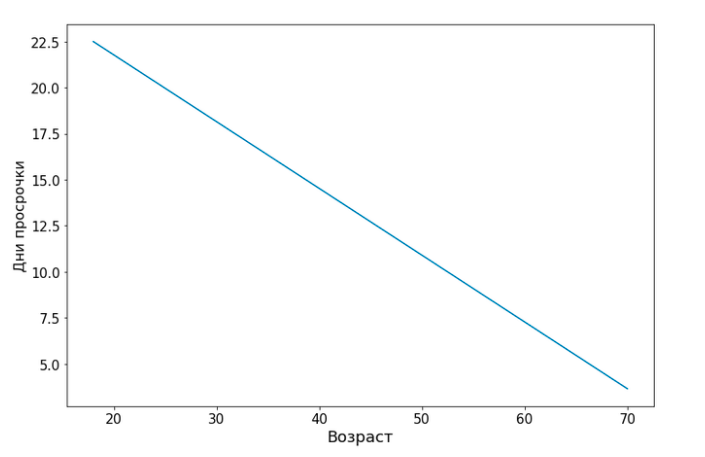

*Линейная зависимость между возрастом и просрочкой выплаты. Источник: Хабр*

→ Более точной является визуализация зависимости признаков. С этим подходом мы подробнее познакомимся в следующем юните, посвящённом визуализации связей между признаками.

Для большинства непрерывных признаков это подходящий метод вычисления коэффициента корреляции. Однако при его использовании вы предполагаете, что признаки приблизительно нормально распределены и не имеют выбросов.

                                       НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Большинство окружающих нас процессов и явлений, характеристик объектов можно описать **нормальным распределением**. В основном это переменные, которые зависят от множества факторов, например рост человека. Он сформировался благодаря местности, в которой проживает человек, генетическим предрасположенностям, перенесённым заболеваниям и так далее. Как следствие, показатели роста подвергаются законам нормального распределения.

Если признак является совокупностью **очень редких событий**, например аварии на дорогах, то распределение признака нормальным не будет.

С точки зрения визуализации нормальное (**гауссово**) распределение представляет собой распределение признака в виде колокола.

Нормальность распределения признака можно определить визуально, построив гистограмму распределения непрерывного признака или так называемый q-q plot. Подробнее о принципе построения данного графика советуем прочитать [здесь](https://habr.com/ru/articles/578754/).

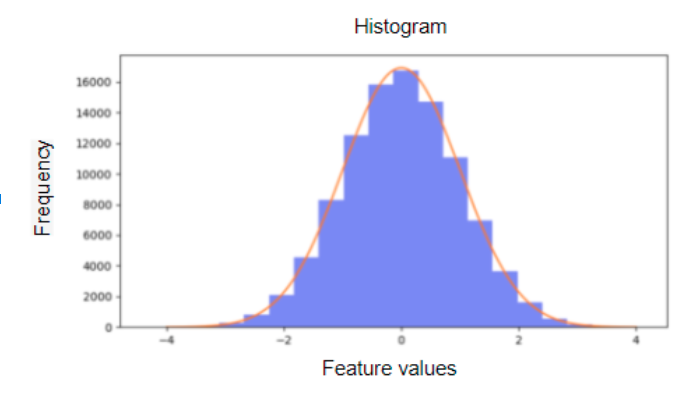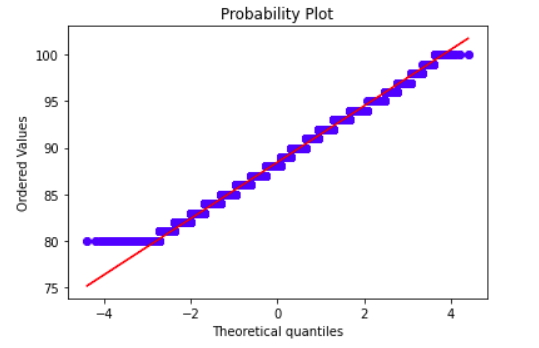

*Cхематичное изображение нормального распределения, график q-q plot.*

На гистограмме распределение должно напоминать колокол (верхний график на рисунке), а q-q plot должен напоминать прямую линию (нижний график на рисунке).

→ Давайте проверим наши данные винных обзоров на нормальность, используя метод визуализации.

Для этого воспользуемся пакетом **stats** статистических распределений и функций, а также знакомой нам библиотекой **matplotlib** для построения графиков.

Код для построения графиков:


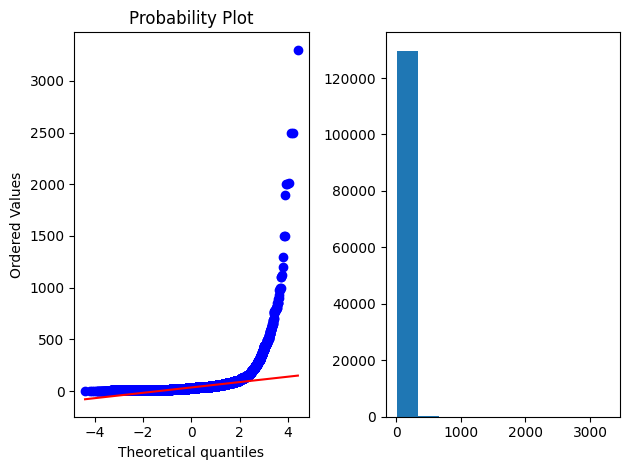

In [2]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(wine_df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(wine_df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout
plt.show() # просмотр графика

*Графики распределение признака price.*

Кажется, признак распределён ненормально, так как q-q plot имеет изогнутую линию, а гистограмма распределения совершенно не похожа на колокол.

Такой признак при анализе Пирсоном может выдать некорректные результаты. Для таких случаев существуют другие виды корреляций или проводится операция по приведению признака к нормальному путём преобразований, которые вы освоите позже, в юнитах про разведывательный анализ данных.

Задание 4.2

Постройте приведённые выше графики для признака points из датасета винных обзоров и выберите верное утверждение:

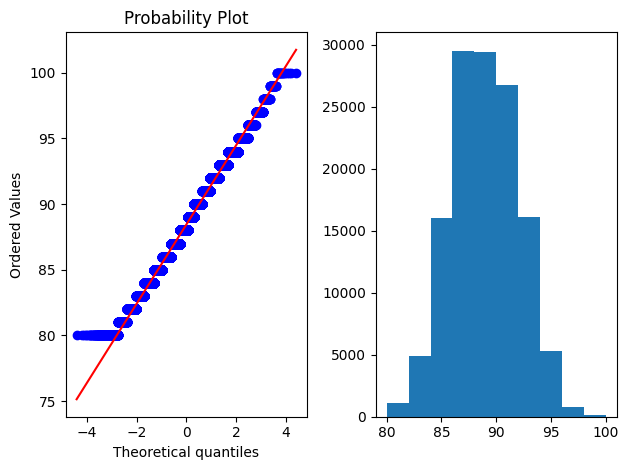

In [3]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(wine_df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(wine_df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout
plt.show() # просмотр графика

Признак нормально распределён.

Задание 4.3

Выберите верные утверждения:


- Корреляция Пирсона плохо работает с выбросами в признаках.
- Корреляцию Пирсона можно рассчитать для нескольких признаков.
- Для корреляции Пирсона данные должны быть распределены нормально.



                              Итак, что мы узнали в этом юните?

- Корреляция между непрерывными признаками, которые имеют близкое к нормальному распределение, может быть рассчитана с использованием стандартной корреляции Пирсона. 
- Для категориальных данных используются методы ранговой корреляции, например Спирмена и Кендалла, которые будут изучены в следующем юните. 
- Для непрерывных переменных, имеющих большое количество выбросов или распределённых ненормально, могут использоваться методы по устранению выбросов и нормализации данных, которые будут изучены далее в курсе. Также могут быть использованы методы ранговой корреляции.

В следующем юните вы познакомитесь c другими типами корреляции: Спирмена, Кендалла и Мэтьюса.